# Class Performance check

This notebooks provides an overview for using and understanding the class performance check.

**Structure:**

- [What is the purpose of the check?](#purpose)
- [Classification](#classification)
    - [Generate data & model](#generate_c)
    - [Defining the Prediction Formatter](#pred_format_c)
    - [Run the check](#run_check_c)
- [Object Detection](#obj_det)
    - [Generate data & model](#generate_o)
    - [Defining the Prediction Formatter](#pred_format_o)
    - [Run the check](#run_check_o)
    

## What is the purpose of the check? <a name='purpose'></a>

The class performance check evaluates several metrics on the given model and data and returns all of the results in a single check. For each task type it has default metrics (e.g. precision and recall per class for classification, and AP per class for object detection).

In addition to the default metrics, the check supports custom metrics that shuld be implemented using the [torch.ignite.Metric](https://pytorch.org/ignite/metrics.html#how-to-create-a-custom-metric). These can be passed as a list using the `alternative_metrics` parameter of the check, which will override the default metrics.

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from deepchecks.vision.checks.performance import ClassPerformance

/Users/jonthanliberman/Documents/deepchecks/deepchecks/__init__.py:154: DeprecationWarning:

Ability to import base tabular functionality from the `deepchecks` package directly is deprecated, please import from `deepchecks.tabular` instead



## Classification Performance Report <a name='classification'></a>


### Generate data and model: <a name='generate_c'></a>

In [3]:
from deepchecks.vision.datasets.classification import mnist

mnist_model = mnist.load_model()
train_ds = mnist.load_dataset(train=True, object_type='VisionData')
test_ds = mnist.load_dataset(train=False, object_type='VisionData')

In [4]:
from ignite.metrics import Precision, Recall, Metric

### Run the check <a name='run_check_c'></a>

Class Performance Summarize given metrics on a dataset and model. Read More... Additional Outputs

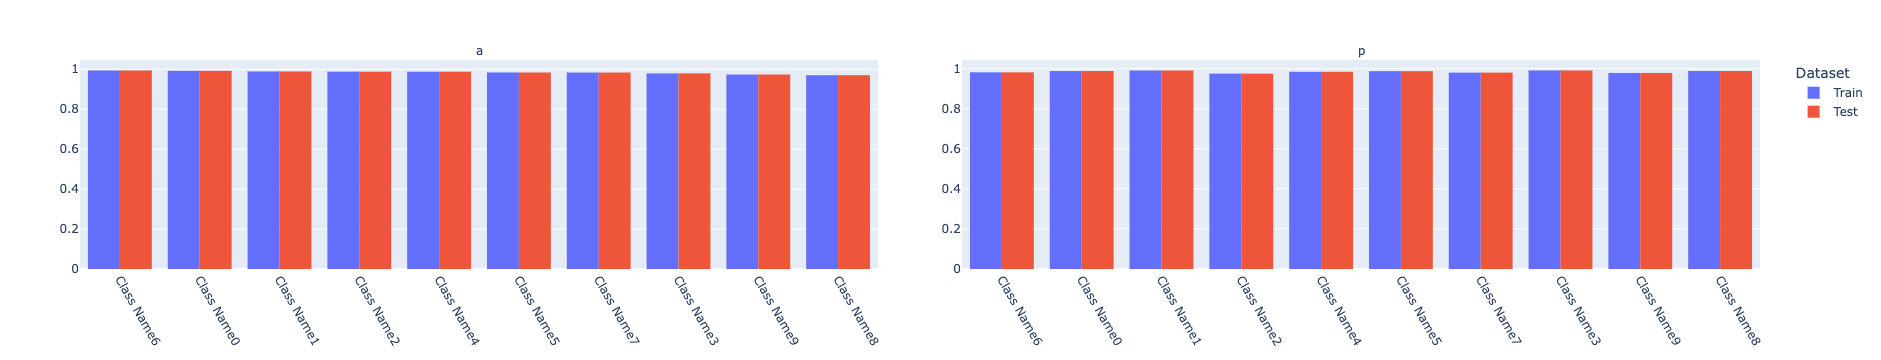

In [15]:
check = ClassPerformance(alternative_metrics={"p": Precision(), 'a': Recall()})
check.run(train_ds, test_ds, mnist_model)

## Object Detection Class Performance  <a name='obj_det'></a>

For object detection tasks - the default metric that is being calculated it the Average Precision. The definition of the Average Precision is identical to how the COCO dataset defined it - mean of the average precision per class, over the range [0.5, 0.95, 0.05] of IoU thresholds.

In [5]:
import numpy as np
from deepchecks.vision.datasets.detection import coco


### Generate Data and Model <a name='generate_o'></a>

We generate a sample dataset of 128 images from the [COCO dataset](https://cocodataset.org/#home), and using the [YOLOv5 model](https://github.com/ultralytics/yolov5).

In [6]:
yolo = coco.load_model(pretrained=True)

train_ds = coco.load_dataset(train=True, object_type='VisionData')
test_ds = coco.load_dataset(train=False, object_type='VisionData')

  0%|          | 0.00/14.1M [00:00<?, ?B/s]

### Run the check <a name='run_check_o'></a>

Class Performance Summarize given metrics on a dataset and model. Read More... Additional Outputs

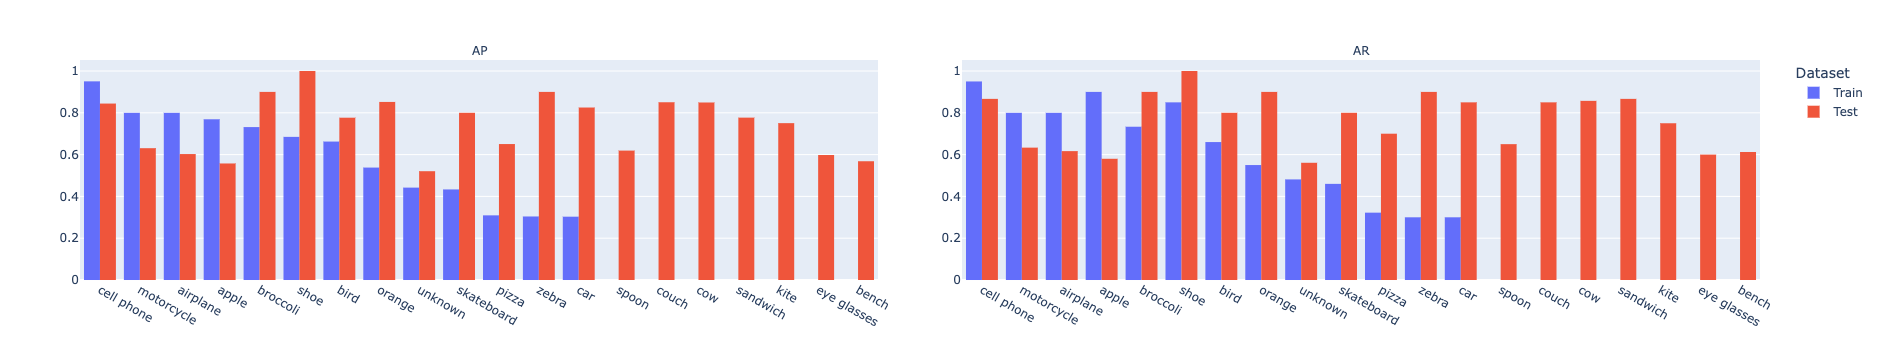

In [8]:
check = ClassPerformance(show_only='best')
check.run(train_ds, test_ds, yolo)